
# SCHISM procedural example

In this notebook we will use the SCHOSM grid, config and data objects to define a SCHISM workspace

In [1]:
%load_ext autoreload
%autoreload 2

import sys
from datetime import datetime
from pathlib import Path
from rompy.core import DataBlob, TimeRange

here = Path('../../tests/schism')


### Workspace basepath

In [2]:
workdir = Path("schism_procedural")
workdir.mkdir(exist_ok=True)

### Model Grid

/source/rompy/.venv/lib/python3.11/site-packages/pyschism/mesh/parsers/grd.py:192: UserWarning: File ../../tests/schism/test_data/hgrid.gr3 does not contain CRS information and no CRS was given.
  warnings.warn(f'File {str(resource)} does not contain CRS '


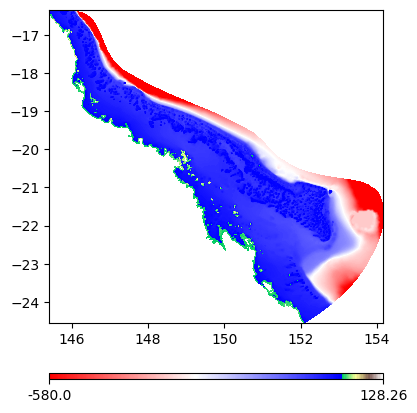

In [3]:
# Grid object

from rompy.schism import Inputs, SCHISMGrid3D

grid=SCHISMGrid3D(
    hgrid=DataBlob(id="hgrid", source=here / "test_data" / "hgrid.gr3"),
    vgrid=DataBlob(id="vgrid", source=here / "test_data" / "vgrid.in"),
    diffmin=DataBlob(id="diffmin", source=here / "test_data" / "diffmin.gr3"),
    diffmax=DataBlob(id="diffmax", source=here / "test_data" / "diffmax.gr3"),
    manning=DataBlob(id="manning", source=here / "test_data" / "manning.gr3"),
    hgrid_WWM=DataBlob(id="hgrid_WWM", source=here / "test_data" / "hgrid_WWM.gr3"),
    wwmbnd=DataBlob(id="wwmbnd", source=here / "test_data" / "wwmbnd.gr3"),
)

grid.plot_hgrid()


### Work with existing data

This example just uses the existing swan spectral dataset. Data is currently incompletes, this is just an illustration at this point.  
This exercise assumes any processing to the raw forcing data is done with tools outside rompy to handle interpolation or any other required data manipulation.

In [4]:
from rompy.schism import Inputs

inputs=Inputs(
    filewave=DataBlob(id="filewave", source=here / "test_data" / "schism_bnd_spec_SWAN_500m_use_in_schism_2021Aug-Nov.nc",
    ),
)

### Instantiate config

Note  that most fields are optional, this eample using defaults values.

In [7]:
from rompy.schism import SchismCSIROConfig

config=SchismCSIROConfig(
    grid=grid,
    inputs=Inputs(
        filewave=DataBlob(id="filewave", source=here / "test_data" / "schism_bnd_spec_SWAN_500m_use_in_schism_2021Aug-Nov.nc",
        ),
    ),
)


### Generate workspace


In [8]:
from rompy.model import ModelRun

run = ModelRun(
    run_id="test_schism",
    period=TimeRange(start=datetime(2021, 8, 1, 0), end=datetime(2021, 11, 29, 0), interval="15M"),
    output_dir=str(workdir),
    config=config
)

rundir = run()


### Check the workspace

In [9]:
list(Path(rundir).glob("*"))

[PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/hgrid.gr3'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/datasets'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/README'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/schismv59_petrichor_VH_multinode.sh'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/wwminput.nml'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/diffmin.gr3'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/vgrid.in'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/sflux'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/windrot_geo2proj.gr3'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/outputs'),
 PosixPath('/source/rompy/notebooks/schism/schism_procedural/test_schism/wwmbnd.gr3'),
 PosixPath('/source/ro